In [2385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings 
warnings.filterwarnings('ignore')


## Step 1: Reading and Understanding the Data

In [2386]:
bikes = pd.read_csv('day.csv')

In [2387]:
bikes.shape

(730, 16)

In [2388]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2389]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2390]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [2391]:
#Checking Null values
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Removing unwanted columns

In [2392]:
# casual and registered : Not required as the target variable is cnt and cnt = casual + registered
# instant: Not required as it just gives the row number
# dteday: Not required as we already have, month, year and day columns
# atemp: Not required as we already have another column called 'temp'.Not removing this will create a siution of multicollinearity

bikes.drop(labels = ['instant', 'dteday', 'atemp','casual','registered'], axis =1, inplace=True)

In [2393]:
bikes.shape

(730, 11)

## Step 2: Visualizing the Data

### Visualizing Numeric Variables

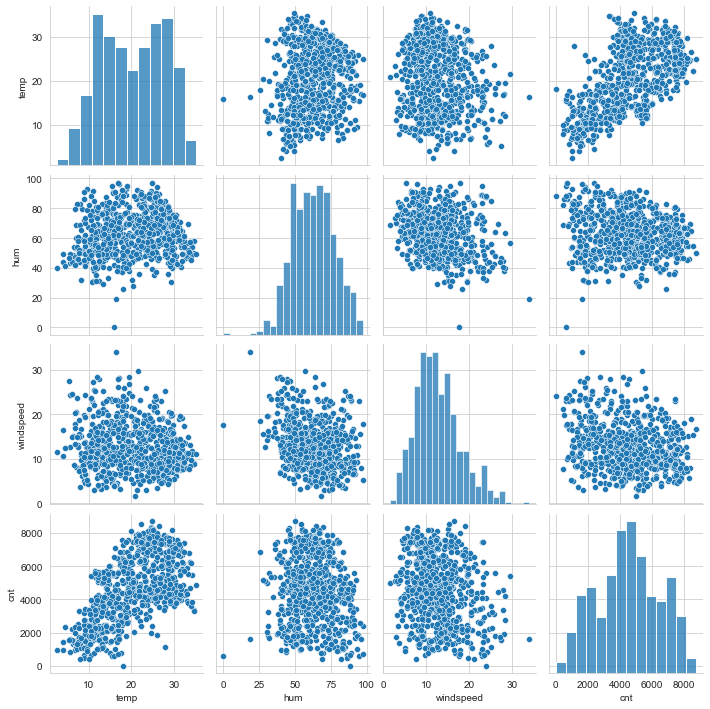

In [2394]:
sns.pairplot(bikes[['temp','hum','windspeed','cnt']])
plt.show()

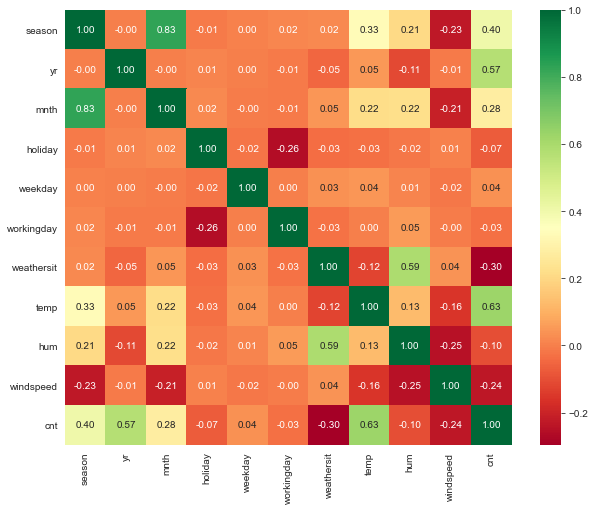

In [2395]:
# Creating heatmap
plt.figure(figsize=(10,8))
sns.heatmap(bikes.corr(), annot =True, fmt='.2f', cmap='RdYlGn')
plt.show()

### Inferences
- 'Temp' has the highest correlation with 'cnt'
- 'yr' has a good positive correlation with 'cnt'


### Handling Categorical Variables


#### Let's map the categorical variables to there corresponding string values

In [2396]:
bikes.season = bikes.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
bikes.mnth =  bikes.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',
                              7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bikes.weathersit = bikes.weathersit.map({1:'clear',2:'mist_cloudy',3:'light_rain',4:'heavy_rain'})
bikes.weekday = bikes.weekday.map({1:'mon',2:'tue', 3:'wed',4:'thu',5:'fri',6:'sat',0:'sun'})

### Visualizing Categorical Variables

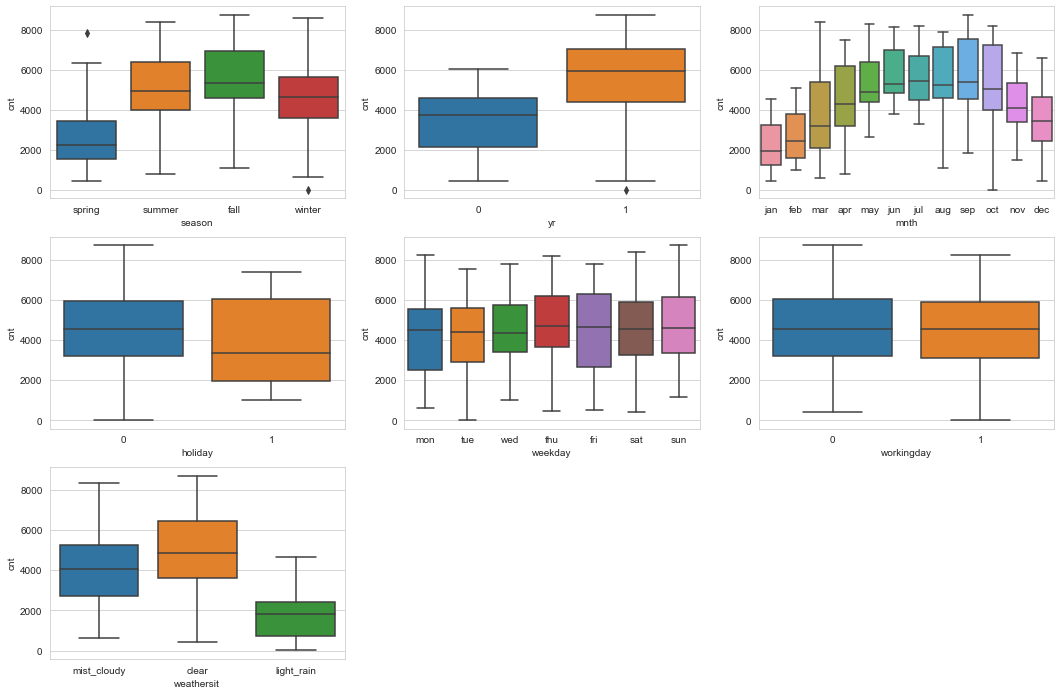

In [2397]:
plt.figure(figsize=(18,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt',data = bikes) 
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt',data = bikes)  
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt',data = bikes) 
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt',data = bikes) 
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt',data = bikes) 
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt',data = bikes) 
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt',data = bikes) 
plt.show()


### Inferences
1. Maximum bike booking happened during ‘fall’ season followed by ‘summer’ and then ‘winter’ season.
2. A considerable increase can booking can be seen from 2018 to 2019
3. Maximum number of bike bookings happened from May to October .
4. On holidays, less number of bikes were booked as compared to regular days.
5. Weekday shows a very similar trend throughout the week.
6. Median for both working and non-working day is almost same, which is around 4000
7. Highest number of bookings were happening in ‘clear’ weathersit followed by ‘mist_cloudy’ weather.

In [2398]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


## Step 3: Preparing the Data

In [2399]:
bikes.shape

(730, 11)

### Creating Dummy Variables for Categorical variables

In [2400]:
bikes = pd.get_dummies(bikes,drop_first=True)

In [2401]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_light_rain', 'weathersit_mist_cloudy'],
      dtype='object')

In [2402]:
bikes.shape

(730, 29)

In [2403]:
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_mist_cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [2404]:
# Keeping a 70-30 split in the train and test data
bikes_train, bikes_test = train_test_split(bikes, train_size=0.7, test_size=0.3, random_state= 100)

In [2405]:
print(bikes_train.shape)
print(bikes_test.shape)

(510, 29)
(219, 29)


### Rescaling the numerical feature, here we are using MinMax Scaling

In [2406]:
# Apply scaler() to all the columns except the 'binary' and 'dummy' variables
scaler = MinMaxScaler ()
num_cols = ['temp','hum','windspeed','cnt']
bikes_train[num_cols] = scaler.fit_transform(bikes_train[num_cols])

In [2407]:
bikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_mist_cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [2408]:
# Check all variable ranges
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
bikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing train data  into X and Y sets for the model building 

In [2409]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

## Step 5: Training the Model

### Performing RFE

In [2410]:
# Running RFE with ouput number of variables = 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)                  
rfe = rfe.fit(X_train, y_train)

In [2411]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 11),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 10),
 ('weathersit_light_rain', True, 1),
 ('weathersit_mist_cloudy', True, 1)]

In [2412]:
# Columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sep', 'weathersit_light_rain',
       'weathersit_mist_cloudy'],
      dtype='object')

In [2413]:
# Columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

### Building model using statsmodel, for detailed statistics

In [2414]:
#Creating Train dataset with RFE selected columns
X_train1 = X_train[col]

### First Model lm1

In [2415]:
# Adding a constant variable 
X_train1 = sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train1).fit()
#Summary
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          3.34e-189
Time:                        22:31:21   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### VIF calculation for lm1

In [2416]:
X_train1 = X_train1.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
14,weathersit_mist_cloudy,2.32
0,yr,2.09
11,mnth_nov,1.83
9,mnth_jan,1.75



#### R Squared and adjusted r squared are looking good, but VIF and P values of the features are quite high. Hence, lets tweak the model.
### Dropping 'hum' for its very high VIF value

In [2417]:
X_train2 = X_train1.drop(['hum'], axis=1)

### Second Model lm2

In [2418]:
X_train2 = sm.add_constant(X_train2)
lm2 = sm.OLS(y_train,X_train2).fit()
#Summary
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.57e-186
Time:                        22:31:22   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### VIF calculation for lm2

In [2419]:
X_train2 = X_train2.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
10,mnth_nov,1.80
8,mnth_jan,1.66
9,mnth_jul,1.59
13,weathersit_mist_cloudy,1.56



###  Dropping 'season_summer' on account of its a slightly high P value

In [2420]:
X_train3 = X_train2.drop(['season_summer'], axis=1)

### Third Model lm3

In [2421]:
X_train3 = sm.add_constant(X_train3)
lm3 = sm.OLS(y_train, X_train3).fit()
#summary
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.08e-186
Time:                        22:31:22   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### VIF calculation for lm3

In [2422]:
X_train3 = X_train3.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,season_winter,2.54
4,season_spring,2.36
0,yr,2.06
9,mnth_nov,1.80
7,mnth_jan,1.65
12,weathersit_mist_cloudy,1.53
6,mnth_dec,1.46
8,mnth_jul,1.36



###  Dropping 'mnth_nov' on account of its a slightly high P value

In [2423]:
X_train4 = X_train3.drop(['mnth_nov'], axis=1)


### Fourth Model lm4

In [2424]:
X_train4 = sm.add_constant(X_train4)
lm4 = sm.OLS(y_train, X_train4).fit()
#Summary
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.02e-186
Time:                        22:31:22   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### VIF calculation for lm4

In [2425]:
X_train4 = X_train4.drop(['const'], axis = 1)
vif=pd.DataFrame()
X = X_train4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,season_spring,2.36
0,yr,2.06
5,season_winter,1.64
7,mnth_jan,1.64
11,weathersit_mist_cloudy,1.53
8,mnth_jul,1.36
6,mnth_dec,1.29
9,mnth_sep,1.20


### Removing 'mnth_dec' on account of its a slightly high P value

In [2426]:
X_train5 = X_train4.drop(['mnth_dec'], axis =1)

### fifth Model lm5

In [2427]:
X_train5 = sm.add_constant(X_train5)
lm5 = sm.OLS(y_train, X_train5).fit()
#Summary
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.13e-186
Time:                        22:31:23   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### VIF calculation for lm5

In [2428]:
X_train5 = X_train5.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,season_spring,2.25
0,yr,2.06
6,mnth_jan,1.60
10,weathersit_mist_cloudy,1.53
5,season_winter,1.40
7,mnth_jul,1.36
8,mnth_sep,1.20
9,weathersit_light_rain,1.08


### Removing 'mnth_jan' on account of its a slightly high P value

In [2429]:
X_train6 = X_train5.drop(['mnth_jan'], axis =1)

### Sixth model lm6

In [2430]:
X_train6 = sm.add_constant(X_train6)
lm6 = sm.OLS(y_train, X_train6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.16e-186
Time:                        22:31:23   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### VIF calculation for lm6

In [2431]:
X_train6 = X_train6.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,season_spring,1.65
9,weathersit_mist_cloudy,1.51
5,season_winter,1.40
6,mnth_jul,1.35
7,mnth_sep,1.20
8,weathersit_light_rain,1.08
1,holiday,1.04


### Lets try dropping 'windspeed' for its high VIF and negative beta coffecient

In [2432]:
X_train7 = X_train6.drop(['windspeed'], axis =1)

### Seventh Model lm7

In [2433]:
X_train7 = sm.add_constant(X_train7)
lm7 = sm.OLS(y_train, X_train7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.16e-181
Time:                        22:31:24   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2434]:
X_train7 = X_train7.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
8,weathersit_mist_cloudy,1.51
4,season_winter,1.33
5,mnth_jul,1.33
3,season_spring,1.25
6,mnth_sep,1.19
7,weathersit_light_rain,1.06
1,holiday,1.04


#### We can see a considerable improvment in VIF values. All the p values are also 0 . R Squared and Adj  R squared also look good.

### Lets try dropping 'temp' and keeping 'windspeed'

In [2435]:
X_train8 = X_train6.drop(['temp'], axis =1)

### Eighth Model lm8

In [2436]:
X_train8 = sm.add_constant(X_train8)
lm8 = sm.OLS(y_train, X_train8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     175.9
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.03e-148
Time:                        22:31:24   Log-Likelihood:                 402.34
No. Observations:                 510   AIC:                            -784.7
Df Residuals:                     500   BIC:                            -742.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### We can a considerable drop in R Squared and Adj R squared values.Also the value P values has increased for mnth_jul. Hence this will not be a good model

### Final Model: lm7
#### We found the final model, for which R-square = 82.3% and adjusted R-square = 81.9%.
#### F-statistic = 257.7 and p-val of ~0.0000 shows that our model is significant.

## Step 6 : Residual Analysis

In [2437]:
X_train7_final = X_train7
X_train7_final = sm.add_constant(X_train7_final)
y_train_pred = lm7.predict(X_train7_final)

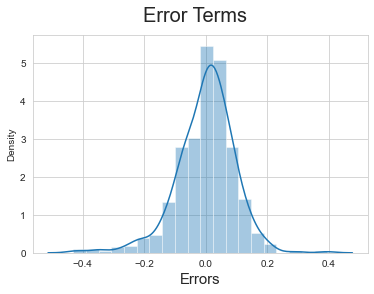

In [2438]:
# Histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 15)
plt.show()

#### Above plot shows that the error terms are Normally Distributed

## Step 7: Making predictions on Test Set

### Scaling on Test set

In [2439]:
bikes_test[num_cols] = scaler.transform(bikes_test[num_cols])

### Creating X_test and y_test

In [2440]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

### Making prediction

In [2441]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train7.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [2442]:
# Making predictions
y_test_pred = lm7.predict(X_test_new)

## Step 8: Model Evalution

Text(0, 0.5, 'y_test_pred')

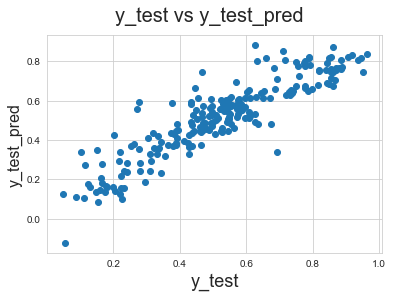

In [2443]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)      

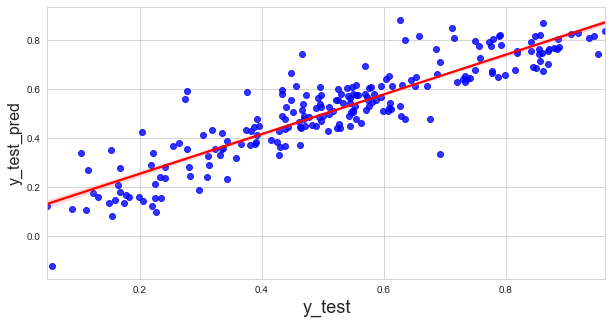

In [2444]:
#Regression plot
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
 
plt.xlabel('y_test', fontsize=18)                            # X-label
plt.ylabel('y_test_pred', fontsize=16)                       # Y-label
plt.show()


### R-squared score on the test set

In [2445]:
r2=r2_score(y_test, y_test_pred)
print(r2)

0.8092200832884748


### Adjusted R-squared score on the test set

In [2446]:
n = X_test_new.shape[0]
p = X_test_new.shape[1]-1
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2)

0.8010046801764953


### Our Model lm7

In [2447]:
lm7.params

const                     0.193838
yr                        0.233037
holiday                  -0.101113
temp                      0.471172
season_spring            -0.110708
season_winter             0.055785
mnth_jul                 -0.068771
mnth_sep                  0.065793
weathersit_light_rain    -0.300245
weathersit_mist_cloudy   -0.079572
dtype: float64

### Final Result Comparision
1. Train: R-square = 82.3%, Adjusted R-square = 81.9%
2. Test: R-square = 80.9% , Adjusted R-square = 80.1%

### Conclusion
Equation of our best fitted line is

##### cnt = 0.193 + (0.233 * yr)+(-0.101 * holiday)+(0.471 * temp)+(-0.11 * season_spring)
#####                    + (0.055 * season_winter )+(-0.068 * mnth_jul)+(-0.065 * mnth_sep)
#####                    + (-0.3 * weathersit_light_rain)+(-0.079 * weathersit_mist_cloudy)


            
The top 3 predictor variables are:
1. temp: It has a coefficient of 0.471
2. weathersit_light_rain : It has a coefficient of -0.3
3. yr: It has a coefficient 0.233


A unit change in the top predictor variables, will affect the target variable ‘cnt’ to the maximum extent. Hence
temp, weathersit_light_rain and yr should be given the top priority stand out from other service providers and make huge profits.
